### Import libraries

In [109]:
import pandas as pd
import os
import shutil
import sys
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
# import tensorflow as tf
from tensorflow import keras
import tensorflow

from  tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

### Check out the directories

In [3]:
# inserting the parent directory into current path
sys.path.insert(1, '../Lung_Disease_Detection_Deeplearning/')

In [4]:
os.listdir('../Dataset_augmented_subfolders/')

['Test', 'Train', 'val']

In [5]:
os.listdir('../\Dataset_augmented_subfolders/Train/')

['COVID', 'NORMAL']

In [6]:
Train_NORMAL = os.listdir('../Dataset_augmented_subfolders/Train/NORMAL/')
print('Train_NORMAL = ', len(Train_NORMAL))

Train_NORMAL =  563


In [7]:
Train_Covid = os.listdir('../Dataset_augmented_subfolders/Train/COVID/')
print('Train_Covid = ', len(Train_Covid))

Train_Covid =  584


## Quick look to the images 

In [8]:
print('names \n ', Train_NORMAL[0], '\n' ,Train_Covid[0])

names 
  augmented_normal_0_4086.jpeg 
 augmented_covid_0_4049.jpeg


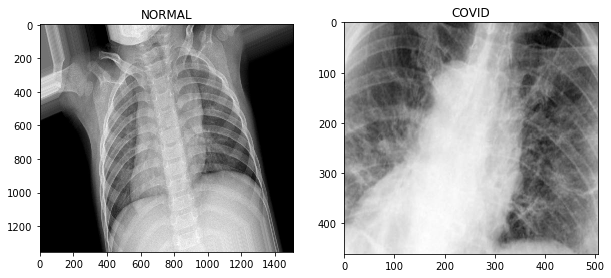

In [9]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc

img_name = 'augmented_normal_0_4086.jpeg '
img_normal = load_img('../Dataset_augmented_subfolders/Train/NORMAL/' + img_name)

img_name_1 = 'augmented_covid_0_4049.jpeg'
img_pneumonia = load_img('../Dataset_augmented_subfolders/Train/COVID/' + img_name_1)

fig, axs = plt.subplots(1,2,figsize=(10,6))
axs[0].imshow(img_normal)
axs[0].set_title("NORMAL")
axs[1].imshow(img_pneumonia)
axs[1].set_title("COVID");

plt.savefig("../Assets/plot_01_assets_1.png")

### Prepare the data

In [14]:
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [15]:
test_generator = test_dataset.flow_from_directory(
                        directory='../Dataset_augmented_subfolders/Test/',
                        target_size=(224,224),
                        color_mode="rgb",
                        classes=None,
                        class_mode="binary",
                        batch_size=32,
                        shuffle=True,
                        seed=1234,
                        save_to_dir=None,
                        save_prefix="",
                        save_format="png",
                        follow_links=False,
                        subset=None,
                        interpolation="nearest")

Found 200 images belonging to 2 classes.


### Show some images in test

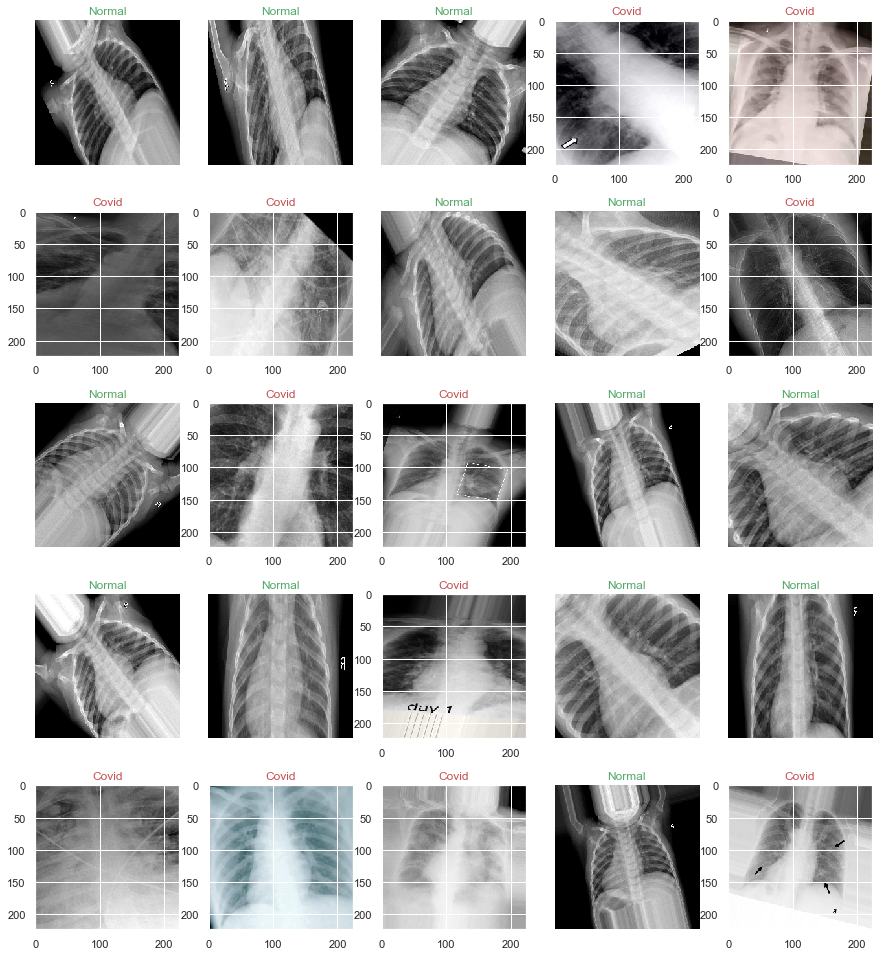

In [112]:
# ref https://www.kaggle.com/feyzazkefe/pneumonia-detection-using-cnn-89-42-acc
image_batch, label_batch = next(iter(test_generator))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(15, 17))
    for n in range(25):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n])
        if label_batch[n] ==0:
            tit = plt.title("Covid")
            plt.setp(tit, color='r')

        else:
            tit = plt.title("Normal")
            plt.setp(tit, color='g')
            plt.axis("off")

show_batch(image_batch, label_batch)
# plt.savefig("../Assets/plot_01_assets_2.png")

### Model evaluation

In [28]:
path_1 = '../Codes/Models/model_twoClass.h5'
model = keras.models.load_model(path_1)
# model.summary()

In [36]:
evalu = model.evaluate_generator(test_generator)
print(f"loss = {evalu[0]} \nacc = {evalu[1]} \nauc = {evalu[2]}")

loss = 0.3398384153842926 
acc = 0.8999999761581421 
auc = 0.9648000001907349


### Test model on test set data

Check out the Normal cases data from normal test directory

In [126]:
NORMAL_img_list = os.listdir('../Dataset_augmented_subfolders/Test/NORMAL/')
NORMAL_img_list = [i for i in NORMAL_img_list if i !='.DS_Store']
# plt.figure(figsize=(20, 10)) 
labels = []
model_probabilities_normal = []
for i, img in enumerate(NORMAL_img_list):
    path_to_img = '../Dataset_augmented_subfolders/Test/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)
    feature_output = model.predict_classes(img)
    model_probabilities_normal.append(((model.predict_proba(img)[0][0]),(1-model.predict_proba(img)[0][0])))
#     lab = np.argmax(feature_output, axis=-1)
    labels.append(feature_output[0][0])
    
# print(labels)

labels2 = pd.DataFrame(labels,columns=['categ'])
labels2['categ'].value_counts(normalize=True)

1    0.97
0    0.03
Name: categ, dtype: float64

check out the covid cases from covid test directory

In [127]:
Covid_img_list = os.listdir('../Dataset_augmented_subfolders/Test/COVID/')
Covid_img_list = [i for i in Covid_img_list if i !='.DS_Store']
labels = []
model_probabilities_covid = []
for i, img in enumerate(Covid_img_list):
    path_to_img = '../Dataset_augmented_subfolders/Test/COVID/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)
    # Generate feature output by predicting on the input image
    feature_output = model.predict_classes(img)
    model_probabilities_covid.append(((model.predict_proba(img)[0][0]),(1-model.predict_proba(img)[0][0])))
#     score = predictions[0]
    labels.append(feature_output[0][0])
    
# print(labels)
labels2 = pd.DataFrame(labels,columns=['categ'])
labels2['categ'].value_counts(normalize=True)    

0    0.65
1    0.35
Name: categ, dtype: float64

double check the model using generators and evalute funtion

### NORMAL test images

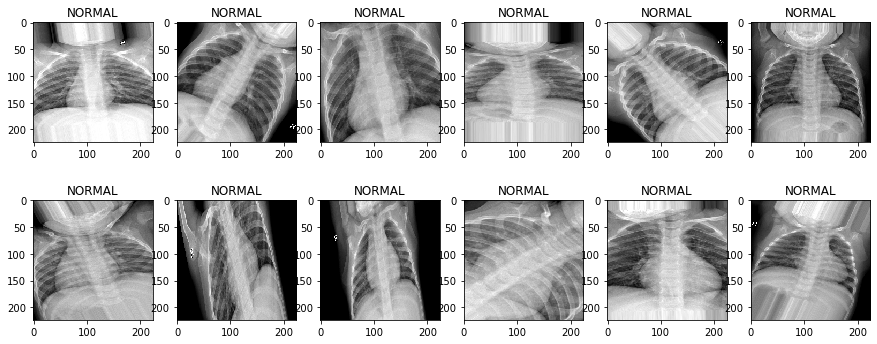

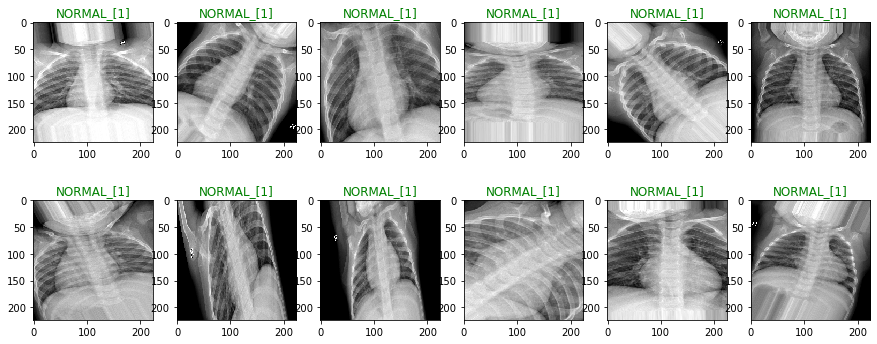

In [26]:
Normal_img_list = os.listdir('../Dataset_augmented_subfolders/Test/NORMAL/')

plt.figure(figsize=(15, 6))

for i, img in enumerate(Normal_img_list[0:12]):
    path_to_img = '../Dataset_augmented_subfolders/Test/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(img)
    plt.title("NORMAL")
    
    
plt.figure(figsize=(15, 6)) 
for i, img in enumerate(Normal_img_list[0:12]):
    path_to_img = '../Dataset_augmented_subfolders/Test/NORMAL/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(img)
    
    
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)
    # Generate feature output by predicting on the input image
    feature_output = model.predict_classes(img)
#     print(feature_output[0])
    
    lab = feature_output[0]
#     print(lab)
    if lab[0]==1:
        plt.title(f"NORMAL_{lab}", color='g')
    else:
        plt.title(f"COVID_{lab}", color='r')
        
plt.savefig("../Assets/P02_plot_01_test_CNN2.png")

### COVID test images

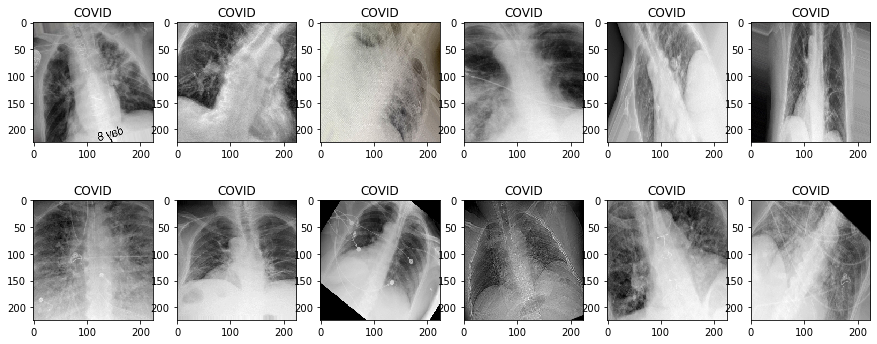

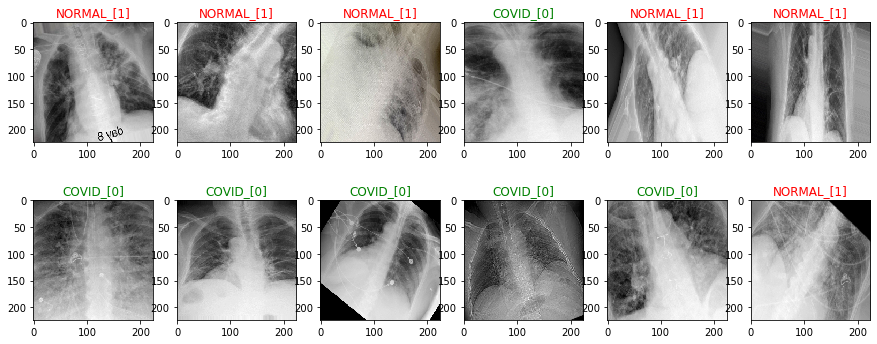

In [27]:
COVID_img_list = os.listdir('../Dataset_augmented_subfolders/Test/COVID/')
# path_to_img = '../Codes/Models/Test_Data_Set/COVID/16669_3_1.jpeg'
plt.figure(figsize=(15, 6))

for i, img in enumerate(COVID_img_list[0:12]):
    path_to_img = '../Dataset_augmented_subfolders/Test/COVID/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(img)
    plt.title("COVID")
    
    
plt.figure(figsize=(15, 6)) 
for i, img in enumerate(COVID_img_list[0:12]):
    path_to_img = '../Dataset_augmented_subfolders/Test/COVID/'+str(img)
    img = load_img(path_to_img, target_size=(224, 224))
    ax = plt.subplot(2, 6, i+1)
    plt.imshow(img)
    
    
    img = img_to_array(img)
    # expand dimensions to match the shape of model input
    img = np.expand_dims(img, axis=0)
    # Generate feature output by predicting on the input image
    feature_output = model.predict_classes(img)
    
    lab = feature_output[0]
#     print(lab)
    if lab[0]==1:
        plt.title(f"NORMAL_{lab}", color='r')
    else:
        plt.title(f"COVID_{lab}", color='g')
        
plt.savefig("../Assets/P02_plot_02_test_CNN2.png")

### ROC curve

In [130]:
model_probabilities_normal
model_probabilities_covid
all_preds = model_probabilities_normal + model_probabilities_covid

make real value output for noraml (1) and covid (0) cases and save it as all

In [135]:
onevals = ([(1,0) for _ in range(100)])
zerosvals = ([(0,1) for _ in range(100)])
real_vals = onevals + zerosvals

In [159]:
# ref : https://towardsdatascience.com/roc-curve-and-auc-from-scratch-in-numpy-visualized-2612bb9459ab
def true_false_positive(threshold_vector, y_test):
    true_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 1)
    true_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 0)
    false_positive = np.equal(threshold_vector, 1) & np.equal(y_test, 0)
    false_negative = np.equal(threshold_vector, 0) & np.equal(y_test, 1)

    
#     Precision = true_positive.sum()/(true_positive.sum()+true_negative.sum())
#     Recall = true_positive.sum()/(true_positive.sum()+false_negative.sum())
#     F1 = 2*(Recall * Precision) / (Recall + Precision)
#     print(f"Precision = {Precision}, Recall = {Recall}, F1 = {F1}")
    
    
    
    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

def roc_from_scratch(probabilities, y_test, partitions=100):
    roc = np.array([])
    for i in range(partitions + 1):
        
        threshold_vector = np.greater_equal(probabilities, i / partitions).astype(int)
        tpr, fpr = true_false_positive(threshold_vector, y_test)
        roc = np.append(roc, [fpr, tpr])
        
    return roc.reshape(-1, 2)

In [160]:
ROC_CNN2 = roc_from_scratch(all_preds,real_vals,partitions=30_000)

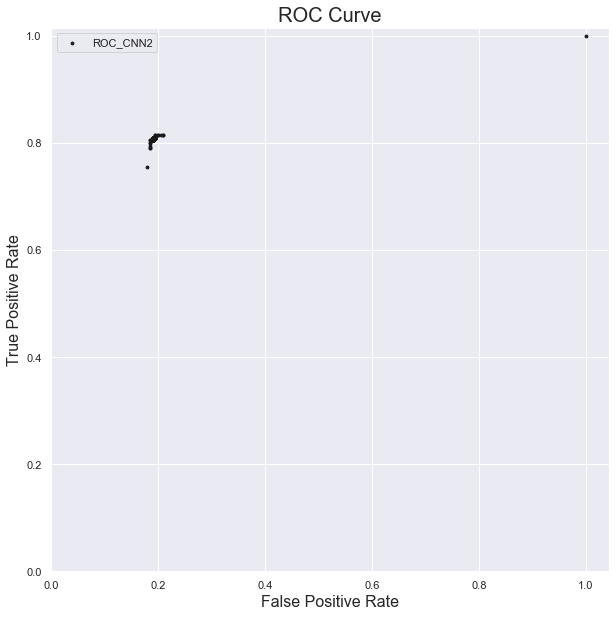

In [162]:
sns.set()
plt.figure(figsize=(10,10))

plt.scatter(ROC_CNN2[:,0],
            ROC_CNN2[:,1], 
            color='k', s=8, 
            label="ROC_CNN2")

plt.title('ROC Curve',fontsize=20)
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.legend()
plt.xlim(0,)
plt.ylim(0,)
plt.savefig("../Figures/P02_test_CNN_2_classes_ROC.png")

AUC value for the test data was around 0.95 using model evaluate generator evaluation above.